# Grundlagen 3: Das Gradientenabstiegs-Verfahren

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ki_kurs.polynom import Polynom

### Unser Gradientenabstiegsverfahren

In [2]:
def koeff(x,y):
    """
    Berechnung der Koeffizienten
    """
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x * x)
    sum_xy = np.sum(x * y)
    N = x.shape[0]
    return sum_xx, sum_x, -sum_xy, sum_x, N, -sum_y

def grad(k,a,b):
    """
    Berechnung des Gradienten im Punkt a,b. Die Koeffizienten wurden bereits berechnet
    """

    sum_x2, sum_x, sum_xy, sum_x, N, sum_y = k
    
    dD_da = 2 * (sum_x2 * a +  sum_x *b  + sum_xy)
    dD_db = 2 * (sum_x * a + N * b + sum_y)
    return dD_da, dD_db

def grad_abstieg(x,y,a,b,epsilon=0.001,iterationen=1000):
    k = koeff(x,y)
    for _ in range(iterationen):
        da,db = grad(k,a,b)
        a -= epsilon * da
        b -= epsilon * db
    return a,b

### Unser Beispiel, mit Gradientenabstieg berechnet

Bei der Linearen Regression hatten wir die Koeffizienten der Ausgleichgerade an einem Beispiel direkt berechnet und erhielten die Gerade $g(x)= 1,553 x + 4,158$ als exakte Lösung des Problems. Wir versuchen nun, dieselbe Aufgabe mit Hilfe des Gradientenabstiegsverfahrens zu lösen.

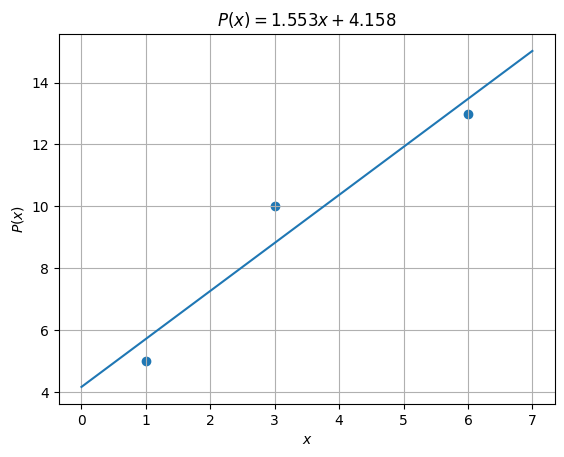

In [3]:
x,y = np.array([1,3,6]),np.array([5,10,13])

m,b = grad_abstieg(x,y,0,0,epsilon=0.01,iterationen=1000)
p = Polynom([b,m])

plt.scatter(x,y)
p.plot(plt,0,7)
plt.show()
